## numpy矩阵操作



首先请你创建四个矩阵$A, B, C, D$，它们都是服从标准正态分布的矩阵，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$，$C$的大小为$40\times 1$, $D$的大小为$40 \times 1$.

In [2]:
import numpy as np
np.random.seed(1)
# 作业：添加你的代码
def rand_Matrix(m,n):
    randArr=np.random.randn(m,n)
    randMat=np.mat(randArr)
    return randMat

A=rand_Matrix(20,40)
B=rand_Matrix(40,40)
C=rand_Matrix(40,1)
D=rand_Matrix(40,1)

### Q1.1 计算$A+A$, $AA^T$, $A^TA$, $AB$. 然后写一个函数对于输入参数$\lambda$，计算$A(B-\lambda I)$.

In [50]:
# 作业：添加你的代码
result1=A+A
result2=A@(A.T)
result3=(A.T)@A
result4=A@B

def chengji(m):
    return A@(B-np.dot(m,np.eye(B.ndim)))

### Q1.2 求解 $\left\{\begin{array}\\x0 + 2 * x1 = 1\\3 * x0 + 5 * x1 = 2 \end{array}\right.$

In [51]:
# 作业：添加你的代码
E=[[1,2],[3,5]]
F=[[1],[2]]
X=np.linalg.solve(E,F)
print(X)

[[-1.]
 [ 1.]]


#### 向量范数

    1-范数： ，即向量元素绝对值之和，matlab调用函数norm(x, 1) 。
    2-范数：，Euclid范数（欧几里得范数，常用计算向量长度），即向量元素绝对值的平方和再开方，matlab调用函数norm(x, 2)。
     ∞-范数：，即所有向量元素绝对值中的最大值，matlab调用函数norm(x, inf)。
     −∞-范数：，即所有向量元素绝对值中的最小值，matlab调用函数norm(x, -inf)。
    p-范数：，即向量元素绝对值的p次方和的1/p次幂，matlab调用函数norm(x, p)。

#### 矩阵范数

    1-范数：， 列和范数，即所有矩阵列向量绝对值之和的最大值，matlab调用函数norm(A, 1)。
    2-范数：，为最大特征值。即A'A矩阵的最大特征值的开平方。matlab调用函数norm(x, 2)。-范数：
    F-范数：，Frobenius范数，即矩阵元素绝对值的平方和再开平方，matlab调用函数norm(A, ’fro‘)。
    无穷范数：矩阵的每一行上的元素绝对值先求和，再从中取个最大的，（行和最大）


### Q2 计算$A$的Frobenius范数$||A||_F$、$B$的无穷范数$||B||_\infty$、

In [52]:
# 作业：添加你的代码
A_F=np.linalg.norm(A,"fro")
B_I=np.linalg.norm(B,np.inf)

#### 矩阵特征值

numpy的矩阵特征值计算提供了两组函数，一组用于通用的矩阵，一组用于赫米特矩阵。另外，每组中又包含两个函数，分别用于只计算特征值，以及特征向量。

1. `w, v = np.linalg.eig(a)`，计算一个方阵的特征值和特征向量，其中特征向量v是归一化后的向量。
2. `w, v = np.linalg.eigh(a, UPLO='L')`，用于赫米特矩阵的特征值计算。其中`UPLO`的取值`L`与`U`分别表示计算时采用`a`的下三角还是上三角矩阵。
3. `w = np.linalg.eigvals(a)`，与1.的最大差别就是没有计算特征向量。
4. `w = np.linalg.eigvalsh(a)`，与2.的最大差别就是没有计算特征向量。



### Q3 求解  $AA^T$ 的特征值的最大和最小值以及对应的特征向量。

In [68]:
# 作业：添加你的代码
w,v=np.linalg.eigh(A@(A.T),UPLO='L')
lamda_max=w.max()
lamda_min=w.min()
idx1=int(np.argwhere(w==lamda_min))
idx2=int(np.argwhere(w==lamda_max))
vector1=v[:,idx1]
vector2=v[:,idx2]

### Q4 请通过采样的方式画出正态分布$N(\mu=100, \sigma=15)$的直方图及其的拟合曲线

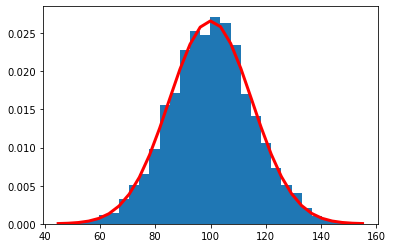

In [22]:
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
mu = 100 #均值 
sigma = 15 # 标准差 

# 作业：请添加你的代码
s = np.random.normal(mu, sigma, 5000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)), linewidth=3, color='r')
plt.show()

#### 奇异值分解（SVD）

SVD将原始的矩阵$Data$分解成三个矩阵$U$,$\Sigma$,和$V^T$，如果原始矩阵$Data$是$m$行$n$列，那么$U$,$\Sigma$,和$V^T$就分别是$m$行$m$列、$m$行$n$列和$n$行$n$列。

为了清晰起见，上述过程可以写成如下一行：$$Data_{m\times n}=U_{m\times m}\Sigma_{m \times n}V^T_{n\times n}$$

上述分解中会构建出一个矩阵$\Sigma$，该矩阵只有对角元素，其他元素均为0. 另一个惯例就是，$\Sigma$的对角元素是从大到小排列的。这些对角元素称为奇异值（Singular Value），它们就是矩阵$Data Data^{T}$特征值的平方根。

在科学工程中，一直存在这样一个普遍事实：在某个奇异值的数目（$r$个）之后，其他的奇异值都置为0.这就意味着数据集中仅有$r$个重要特征，而其余特征则都是噪声或冗余特征。

可以看到矩阵$\Sigma$是以对角线元素组成的行向量返回。

我们来看一个例子。

In [24]:
data = [[1, 1, 1, 0, 0],
        [2, 2, 2, 0, 0],
        [1, 1, 1, 0, 0],
        [5, 5, 5, 0, 0],
        [1, 1, 0, 2, 2],
        [0, 0, 0, 3, 3],
        [0, 0, 0, 1, 1]]

U, Sigma, VT = np.linalg.svd(data)
print(Sigma)

[9.72140007e+00 5.29397912e+00 6.84226362e-01 4.96619610e-16
 1.57294073e-16]


可以看到矩阵 Σ 是以对角线元素组成的行向量返回。
$\Sigma$中前3个数值比其他的值大了很多，所以我们就可以用如下结果来近似原矩阵
$$Data_{m\times n}\approx U_{m\times 3}\Sigma_{3 \times 3}V^T_{3\times n}$$


### Q5 请你实现用三个奇异值来近似data矩阵的代码

In [46]:
U1=U[:,0:3]
VT1=VT[0:3,:]
Sigma1=np.zeros((3,3))
np.fill_diagonal(Sigma1,Sigma[0:3])
app_data=U1@Sigma1@VT1

我们是如何知道仅需保留3个奇异值的呢？确定要保留的奇异值的数目有很多启发式策略，其中一个典型的做法就是保留矩阵中90%的能量信息。

为了计算总能量信息，我们将所有的奇异值平方后求和。于是可以将奇异值的平方和累加到总值的90%为止。

接下来我们来看一个将SVD应用于图像压缩的例子。

#### 基于SVD的图像压缩 + matplot可视化不同个数的特征值对应能保留的能量占比

   

In [26]:
import numpy as np
from PIL import Image

img = Image.open("lena.jpeg")
arr = np.array(img)  # [height, width] 灰度图只有一个通道





### Q6.1 对图片进行SVD分解，然后保留前numSV个奇异值，获得近似图片
下面代码框架仅为参考，可以自行设计，实现功能即可

In [47]:
def compress(arr, numSV):
    U, Sigma, VT = np.linalg.svd(arr)
    U1=U[:,0:numSV]
    VT1=VT[0:numSV,:]
    Sigma1=np.zeros((numSV,numSV))
    np.fill_diagonal(Sigma1,Sigma[0:numSV])
    app_arr=U1@Sigma1@VT1
    return app_arr

new_im = compress(arr,50)
new_im = Image.fromarray(np.uint8(new_im))
new_im.show()

### Q6.2 自行设计并实现一种方案，用matplotlib可视化前k个特征值占矩阵总能量的百分比，以突出在某个特定的k值处进行降维矩阵的能量损失相对较小。这里需要考量两方面因素，希望有较低的维度，但较小的能量损失。

In [69]:
def find_dim(Sigma,energy):
    dim=len(Sigma)
    totle=np.linalg.norm(Sigma,2)**2
    for i in range(dim):
        Sigma1=Sigma[0:i]
        part=np.linalg.norm(Sigma1,2)**2
        result=part/totle
        if result>energy:
            return i+1

#将能量值大于一个定值的图片保存，命名为“dim=奇异值个数 energy>能量.jpeg” 
#由结果可以看出，当能量大于0.985，奇异值个数为16时，已经可以辨认出图像
U, Sigma, VT = np.linalg.svd(arr)
for i in[0.96,0.97,0.98,0.985,0.99,0.995,0.999]: 
    dim=find_dim(Sigma,i)
    new_im = compress(arr,dim)
    new_im = Image.fromarray(np.uint8(new_im))
    new_im.save("dim="+str(dim)+" energy>"+str(i)+".jpeg","jpeg")        